# Inlcuding Header Files 

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve , roc_auc_score
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# Loading the dataset

In [19]:
file = pd.read_csv("data.csv" , index_col= 0)
file.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


# Dividing dataset into features and result

In [20]:
x = file[["location" , "country" , "gender" , "age" , "vis_wuhan" , "from_wuhan" , "symptom1" , "symptom2" , "symptom3"
          , "symptom4" , "symptom5" , "symptom6" , "diff_sym_hos"]].values ## features
y = file.result.values ## result

# Resampling dataset

In [21]:
## splitting the dataset into xTrain , yTrain , xTest , yTest
xTrain , xTest , yTrain , yTest = train_test_split(x,y, test_size= 0.1 , shuffle= True , random_state= 3)

# Feature scaling

we are making feature scaling to the training and test data of independent variables , to reduce the size to a smaller value

In [22]:
sc = StandardScaler()
X_train = sc.fit_transform(xTrain)
X_test = sc.transform(xTest)

# K Nearest Neighbor model

now we are training K Nearest Neighbor with the training data

In [23]:
initial_n_neighbors_value = random.randint(1 , 30)
classifier = KNeighborsClassifier(n_neighbors = initial_n_neighbors_value, metric = 'minkowski', p = 2)

# Finding Optimal Hyperparameters

we now will try to find what is the best number of neighbor in KNN model

In [24]:
# define the parameter values that should be searched
# for python 2, k_range = range(1, 31)
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [25]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [26]:
# instantiate the grid
grid = GridSearchCV(classifier, param_grid, cv=10, scoring='accuracy')

In [27]:
# fit the grid with data
grid.fit(xTrain, yTrain)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=20),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [28]:
# view the complete results (list of named tuples)
mean_test_scores = grid.cv_results_["mean_test_score"]
std_test_score = grid.cv_results_["std_test_score"]
params = grid.cv_results_["params"]
print("mean_test_scores\n" , mean_test_scores)
print("\nstd_test_score\n" , std_test_score)
print("\nparams\n" , params)

mean_test_scores
 [0.94072594 0.94332334 0.94338994 0.93178488 0.93949384 0.92793873
 0.93306693 0.92790543 0.92274392 0.92019647 0.92928738 0.92151182
 0.92279387 0.91891442 0.92022977 0.92017982 0.92407592 0.92404262
 0.92535798 0.92664003 0.92792208 0.92146187 0.92404262 0.92016317
 0.92016317 0.91758242 0.91888112 0.91758242 0.92144522 0.91630037]

std_test_score
 [0.03111727 0.0231131  0.01986955 0.02356163 0.02433082 0.02218752
 0.02485274 0.02578259 0.0228826  0.02667134 0.03137263 0.02936878
 0.03288082 0.0292475  0.02657746 0.02539891 0.0257713  0.02653313
 0.02663202 0.02489155 0.02292961 0.0283696  0.02588966 0.02801216
 0.02801216 0.02513833 0.02435253 0.02513833 0.02176964 0.02583083]

params
 [{'n_neighbors': 1}, {'n_neighbors': 2}, {'n_neighbors': 3}, {'n_neighbors': 4}, {'n_neighbors': 5}, {'n_neighbors': 6}, {'n_neighbors': 7}, {'n_neighbors': 8}, {'n_neighbors': 9}, {'n_neighbors': 10}, {'n_neighbors': 11}, {'n_neighbors': 12}, {'n_neighbors': 13}, {'n_neighbors': 14}

Text(0, 0.5, 'Cross-Validated Accuracy')

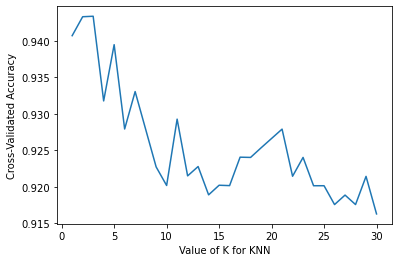

In [29]:
# plot the results
# this is identical to the one we generated above
plt.plot(k_range, mean_test_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [30]:
# examine the best model

# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.9433899433899434
{'n_neighbors': 3}
KNeighborsClassifier(n_neighbors=3)


## Due to when we choose K = 1 , it will be highly affected by noise , So we will choose second best choice at K = 7

# K Nearest Neighbor model with Optimal Hyperparameters

In [31]:
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
classifier.fit(X_train , yTrain)

KNeighborsClassifier(n_neighbors=7)

we will predict the output for the test data

In [32]:
y_pred = classifier.predict(X_test)

# Evaluating the model

we will evaluate our model using the confusion matrix and classification report by comparing the predicted and actual test values

In [33]:
cm = confusion_matrix(yTest, y_pred) ## confusion matrix
cr = classification_report(yTest,y_pred) ## classification report
print("Confusion matrix\n\n" ,cm , "\n")
print(cr)

Confusion matrix

 [[78  1]
 [ 3  5]] 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        79
           1       0.83      0.62      0.71         8

    accuracy                           0.95        87
   macro avg       0.90      0.81      0.84        87
weighted avg       0.95      0.95      0.95        87



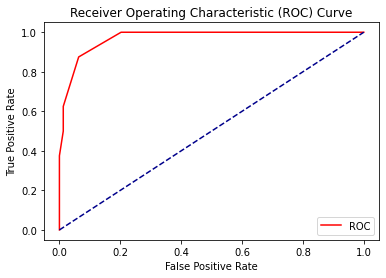

In [34]:
fpr, tpr, thresholds = roc_curve(yTest, classifier.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

In [35]:
roc_auc_score(yTest, classifier.predict_proba(X_test)[:,1])

0.9715189873417722